<a href="https://colab.research.google.com/github/mohamedyosef101/learning_area/blob/area/TensorFlow/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images **of clothing**


In [24]:
# Load the libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
print(f"Last Notebook run: {dt.datetime.now()}")

Last Notebook run: 2024-01-07 09:30:20.470197


# Get the **data**
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset *(by Zalando, MIT License)*.

The contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution *(*28 by 28 pixels*)*

In [25]:
# load the data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
### What we want to classify? ###

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# The string represent the index which means zero rep. T-shirt

# Data **Exploration**

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

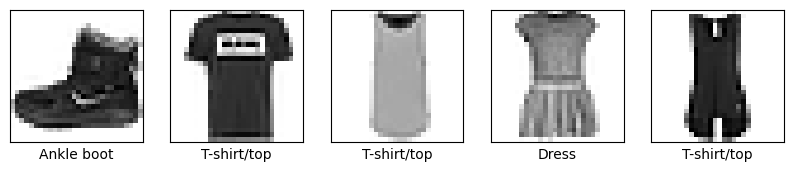

In [30]:
# Verify that the data is in the correct format

plt.figure(figsize=(10, 10))

for i in range(5):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

plt.show()

# Build the **model**

In [31]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [32]:
# compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [33]:
%%time
history = model.fit(X_train, y_train,
          epochs=10, verbose=2, validation_split=0.2)

CPU times: user 1min 10s, sys: 4.97 s, total: 1min 15s
Wall time: 59.9 s


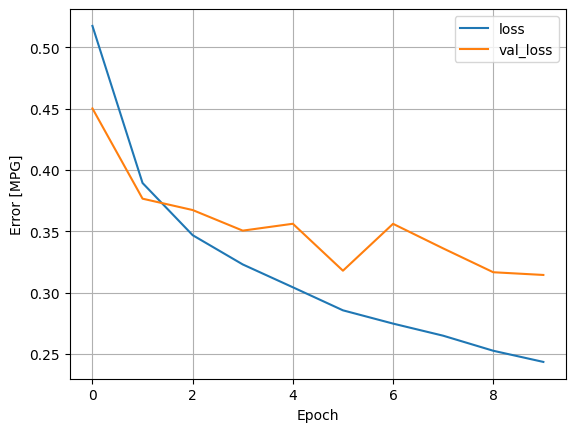

In [34]:
# see what the model have done...
hist = pd.DataFrame(history.history)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [36]:
hist.tail()

,loss,accuracy,val_loss,val_accuracy
5,0.285483,0.894146,0.317808,0.885917
6,0.274663,0.897917,0.356033,0.872500
7,0.264793,0.901625,0.336001,0.879083
8,0.252512,0.906000,0.316543,0.888083
9,0.243407,0.908646,0.314332,0.887833


In [35]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 1s - loss: 0.3399 - accuracy: 0.8814 - 1s/epoch - 3ms/step

Test accuracy:  0.8813999891281128
